# **Bước 1: Cài đặt các thư viện cần thiết**

In [32]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 5.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import geopandas as gpd
import numpy as np
import rtree
import matplotlib.pyplot as plt
import folium
import osmnet
import geojson
import pygeos
import pandas as pd

# **Bước 2: Clone data từ https://github.com/CityScope/CSL_HCMC**

In [34]:
!git clone https://github.com/CityScope/CSL_HCMC

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


# **Bước 3: Load ranh giới quận huyện và dân số quận huyện**

In [35]:
df = gpd.read_file('CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
df

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


# **Bước 4: Load dữ liệu click của người dùng**

In [36]:
df_click = gpd.read_file('/content/click_data.json')
df_click

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
...,...,...
83670,1,POINT (106.65664 10.84339)
83671,1,POINT (106.75180 10.85276)
83672,1,POINT (106.73189 10.73154)
83673,1,POINT (106.67640 10.82388)


# **Bước 5: Lọc ra 5 quận huyện có tốc độ tăng MẬT ĐỘ dân số nhanh nhất (Dùng dữ liệu 2019  và 2017)**

In [37]:
df['Step5'] = (df['Pop_2019'] - df['Pop_2017']) / df['Shape_Area']
df_step5 = df.nlargest(5, 'Step5')
df_step5

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Step5
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",0.001347
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,...,12621.80,12950.50,13223.30,13567.60,14049.50,15105.30,40057.584063,5.191097e+07,"POLYGON ((674953.073 1197210.125, 674961.146 1...",0.001056
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,...,10630.20,10842.20,11065.00,11245.90,11362.30,12410.90,52828.501430,4.775581e+07,"POLYGON ((688796.063 1204383.598, 688818.721 1...",0.001049
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7963.85,8418.12,8798.84,9006.20,9282.35,10216.50,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1...",0.000934
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",0.000881


# **Bước 6: Dùng spatial join để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất**

In [38]:
from geopandas.tools import sjoin

In [39]:
df_click.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
df_step5_crs = df_step5.to_crs(4326)
df_step5_crs

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Step5
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((106.69433 10.89842, 106.69446 10.897...",0.001347
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,...,12621.80,12950.50,13223.30,13567.60,14049.50,15105.30,40057.584063,5.191097e+07,"POLYGON ((106.60037 10.82610, 106.60044 10.826...",0.001056
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,...,10630.20,10842.20,11065.00,11245.90,11362.30,12410.90,52828.501430,4.775581e+07,"POLYGON ((106.72733 10.89026, 106.72753 10.890...",0.001049
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7963.85,8418.12,8798.84,9006.20,9282.35,10216.50,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758...",0.000934
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((106.58361 10.92869, 106.58391 10.928...",0.000881


In [41]:
df_step6 = sjoin(df_click, df_step5_crs, how='inner', predicate='within')
df_step6

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Step5
0,1,POINT (106.71136 10.85113),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.8,10630.2,10842.2,11065.0,11245.9,11362.3,12410.9,52828.501430,4.775581e+07,0.001049
5,1,POINT (106.75131 10.85530),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.8,10630.2,10842.2,11065.0,11245.9,11362.3,12410.9,52828.501430,4.775581e+07,0.001049
11,1,POINT (106.75553 10.84865),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.8,10630.2,10842.2,11065.0,11245.9,11362.3,12410.9,52828.501430,4.775581e+07,0.001049
12,1,POINT (106.75589 10.84450),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.8,10630.2,10842.2,11065.0,11245.9,11362.3,12410.9,52828.501430,4.775581e+07,0.001049
13,1,POINT (106.75193 10.85237),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.8,10630.2,10842.2,11065.0,11245.9,11362.3,12410.9,52828.501430,4.775581e+07,0.001049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77522,1,POINT (106.61004 10.79972),12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12310.5,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,0.001056
77770,1,POINT (106.60046 10.78415),12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12310.5,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,0.001056
80447,1,POINT (106.61018 10.79976),12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12310.5,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,0.001056
80828,1,POINT (106.60046 10.78414),12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12310.5,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,0.001056


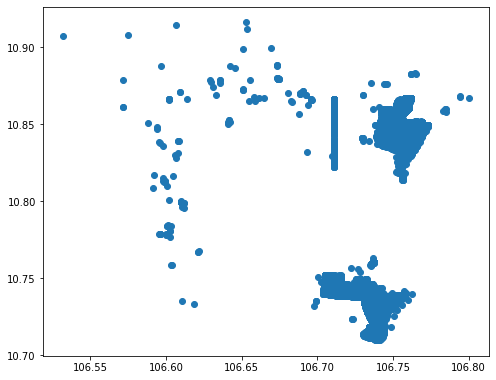

In [42]:
df_step6.plot(figsize=(8,8));

# **Bước 7: chạy KMean cho top 5 quận huyện này. Lấy K = 20**

In [43]:
from sklearn.cluster import KMeans

In [44]:
def kmeans_20(data_frame, dist_name):
    table = data_frame[data_frame.Dist_Name == dist_name]
    kmeans = KMeans(n_clusters = 20)
    x = pd.Series(table['geometry'].apply(lambda p: p.x))
    y = pd.Series(table['geometry'].apply(lambda p: p.y))
    point = np.column_stack((x, y))
    y_means = kmeans.fit_predict(point)
    table['cluster'] = y_means
    return table

In [45]:
district_1 = kmeans_20(df_step6, 'District 12')
district_2 = kmeans_20(df_step6, 'Binh Tan')
district_3 = kmeans_20(df_step6, 'Thu Duc')
district_4 = kmeans_20(df_step6, 'District 7')
district_5 = kmeans_20(df_step6, 'Hoc Mon')

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

# **Bước 8: Lưu 01 cụm điểm nhiều nhất trong các quận huyện ở Bước 5.**

In [46]:
max_1 = district_1['cluster'].value_counts().idxmax()
max_2 = district_2['cluster'].value_counts().idxmax()
max_3 = district_3['cluster'].value_counts().idxmax()
max_4 = district_4['cluster'].value_counts().idxmax()
max_5 = district_5['cluster'].value_counts().idxmax()

In [47]:
cluster_data = dict()
cluster_data['District 12'] = district_1.where(district_1['cluster'] == max_1).dropna()
cluster_data['Binh Tan'] = district_2.where(district_2['cluster'] == max_2).dropna()
cluster_data['Thu Duc'] = district_3.where(district_3['cluster'] == max_3).dropna()
cluster_data['District 7'] = district_4.where(district_4['cluster'] == max_4).dropna()
cluster_data['Hoc Mon'] = district_5.where(district_5['cluster'] == max_5).dropna()

cluster_data['Hoc Mon']

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Step5,cluster
21784,1.0,POINT (106.60194 10.86587),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.000881,0.0
49363,1.0,POINT (106.60183 10.86617),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.000881,0.0
55461,1.0,POINT (106.60181 10.86615),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.000881,0.0
74742,1.0,POINT (106.60175 10.86632),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.000881,0.0
79403,1.0,POINT (106.60172 10.86632),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.000881,0.0


# **Bước 9: Show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP**

In [48]:
data = []
for clu in cluster_data.values():
  x = pd.Series(clu['geometry'].apply(lambda p: p.x)) 
  y = pd.Series(clu['geometry'].apply(lambda p: p.y))
  point = np.column_stack((y, x)) 
  data = data + point.tolist()

In [49]:
from glob import glob
from folium import plugins
from folium.plugins import HeatMap

m = folium.Map([10.8, 106.7], tiles='CartoDB positron', zoom_start=10)
HeatMap(data).add_to(m)

for _, r in df_step5_crs.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)

m

# **Bước 10: Lưu heatmap xuống file png**

In [50]:
!apt-get update 
!apt install chromium-chromedriver
!pip install selenium

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [51]:
import os
from selenium import webdriver

In [52]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

map_path='MAP.html'
m.save(map_path)
map_URL='file://{path}/{mapfile}'.format(path=os.getcwd(), mapfile=map_path)

driver.get(map_URL)

driver.save_screenshot('map.png')
driver.quit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """
